# Project 3: Weather Conditions in World War Two

### Brief Project Description

In this project, we want to give an answer to the question of whether there is a relationship between the daily minimum and maximum temperature. Moreover, we want to predict the maximum temperature given the minimum temperature. This task involves using a linear regression model, where the minimum temperature acts as the independent variable (predictor), and the maximum temperature is the dependent variable (target).

The dataset that we are using throughout this project together with a detailed descrption can be found here: https://www.kaggle.com/datasets/smid80/weatherww2

## Data Import and first Inspection

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv('Summary of Weather.csv')

In [75]:
df.shape

(119040, 31)

In [76]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [78]:
df.shape

(119040, 31)

In [79]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


## Explanatory Data Analysis

To determine whether there is a relationship between the daily minimum and maximum temperature, we first explore the patterns, trends, and correlation between these two variables. We will also examine some basic properties of the dataset.

### Check Dataframe for Duplicates

We are checking the dataframe for any duplicates.

In [80]:
df.duplicated().sum()

10

Since we have duplicates, we drop all of them.

In [81]:
df.drop_duplicates(inplace=True)

### Categorical Variables

Next, we identify our categorical variables.

In [82]:
categorical = [column for column in df.columns if df[column].dtype=='object']

So the following columns are categorical:

In [83]:
categorical

['Date', 'Precip', 'Snowfall', 'PoorWeather', 'PRCP', 'SNF', 'TSHDSBRSGF']

In [84]:
df[categorical].head()

,Date,Precip,Snowfall,PoorWeather,PRCP,SNF,TSHDSBRSGF
0,1942-7-1,1.016,0.0,NaN,0.04,0.0,NaN
1,1942-7-2,0,0.0,NaN,0,0.0,NaN
2,1942-7-3,2.54,0.0,NaN,0.1,0.0,NaN
3,1942-7-4,2.54,0.0,NaN,0.1,0.0,NaN
4,1942-7-5,0,0.0,NaN,0,0.0,NaN


### Distribution of MaxTemp

Since MaxTemp is the variable we would like to predict, we take a closer look at its distribution. That will also allow us to compare the values which MaxTemp takes on with our predicted values. So we are able to check whether our prediction makes sense.

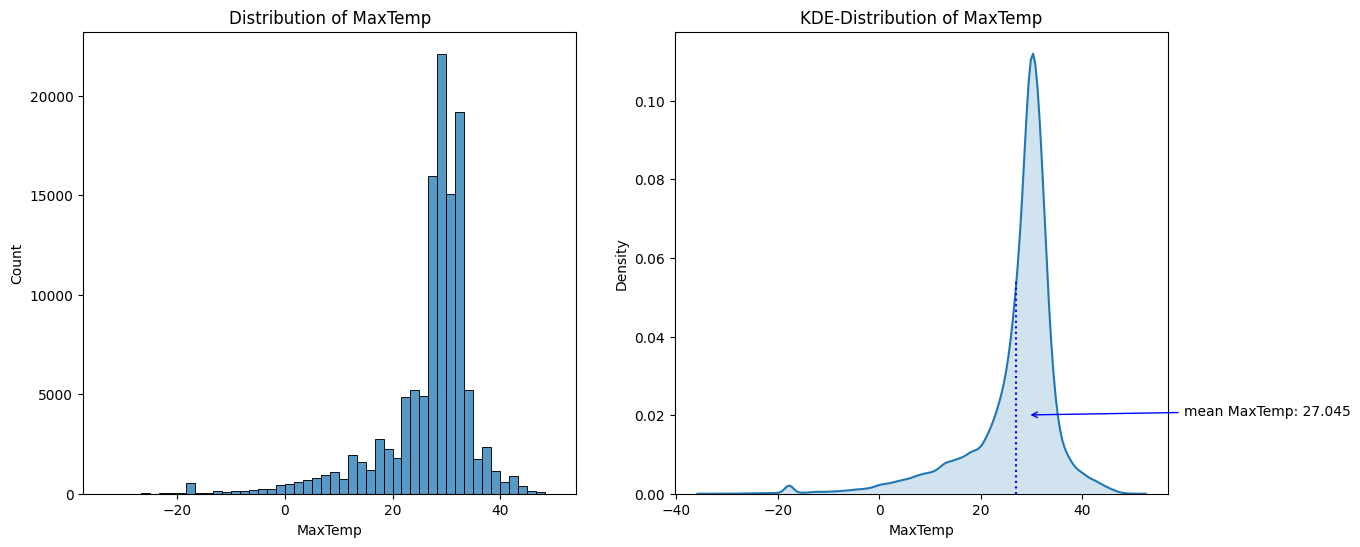

In [85]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='MaxTemp', bins=50)
plt.title('Distribution of MaxTemp')

plt.subplot(1,2,2)
ax = sns.kdeplot(data=df, x='MaxTemp')
plt.title('KDE-Distribution of MaxTemp')

#Get the x,y coordinates and the mean value
kdeline = ax.lines[0]

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()


mean = df["MaxTemp"].mean()

# Calculate the hight of the kde plot at the mean 
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color="blue", ls=':') 
ax.fill_between(xs, 0, ys, alpha=0.2) 
plt.xlabel('MaxTemp')


# Annotate the kde-plot  
plt.annotate(
    'mean MaxTemp: ' + str(np.round(df["MaxTemp"].mean(),decimals=3)),
    xy=(df["MaxTemp"].mean(), 0.02),
    xytext=(60, 0.02),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10));


### Graphical Relationship between MinTem and MaxTemp

For investigation the relationship between MinTem and MaxTemp, it would be a good start to visualize it by scatterplot.

Text(0.5, 1.0, 'Relationship between MinTemp and MaxTemp')

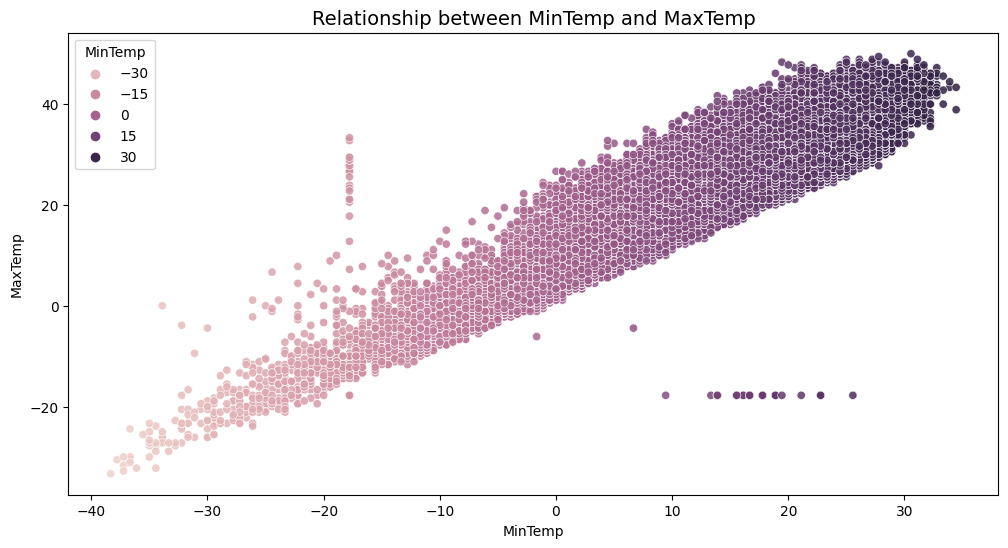

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp',alpha=0.85, hue='MinTemp')
plt.title('Relationship between MinTemp and MaxTemp', fontsize=14)

Next, we add a regression line to the plot above. The regression line will help to visualize the overall trend or relationship between MinTemp and MaxTemp. We also incorporate the distribution of the MinTemp and MaxTemp variables into the plot. This yields the following joint plot.

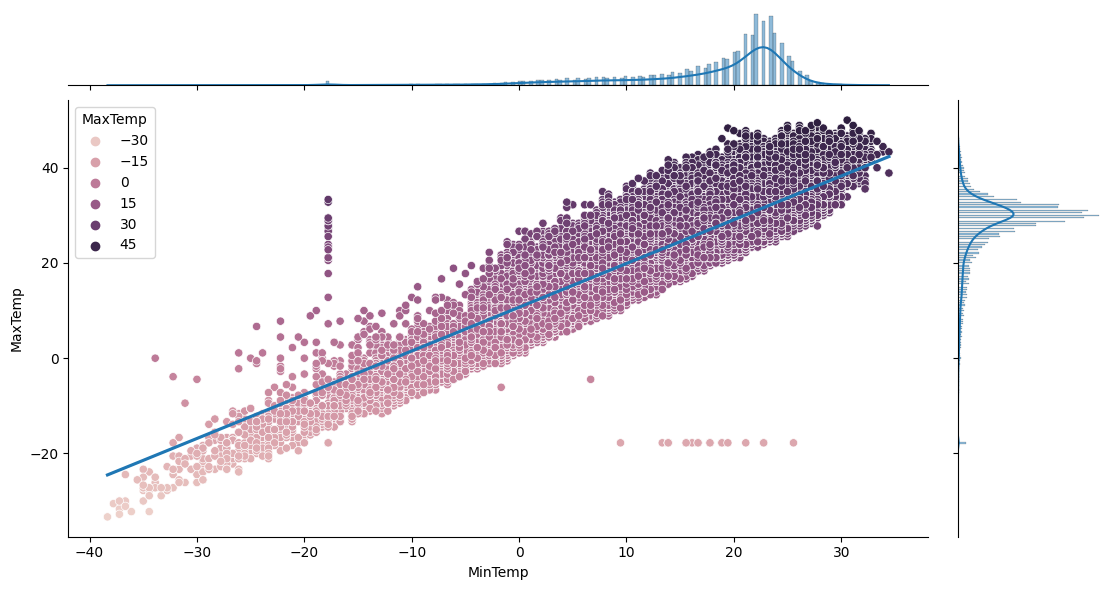

In [87]:
g = sns.jointplot(x=df['MinTemp'], y=df['MaxTemp'], data=df, kind='reg', scatter = False)

sns.scatterplot(y=df['MaxTemp'], x=df['MinTemp'], data=df, hue="MaxTemp", ax=g.ax_joint)

g.fig.set_size_inches((12, 6))

plt.show()

We can see a relatively even spread around the diagonal line.

### Correlation between MinTemp and MaxTemp

We can further analyze the relationship between MinTemp and MaxTemp by computing their correlation and plotting out that result.

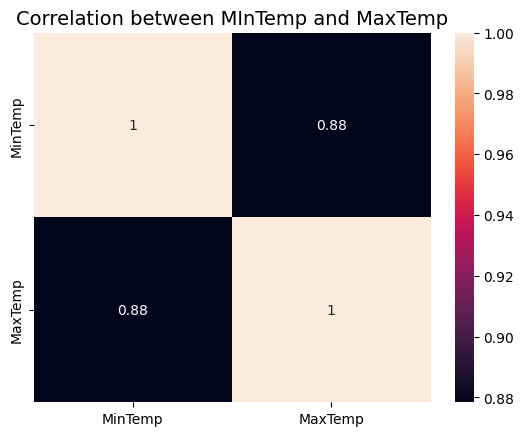

In [88]:
sns.heatmap(df[['MinTemp','MaxTemp']].corr(),annot=True)
plt.title('Correlation between MInTemp and MaxTemp', fontsize=14);

## Creating a Machine Learning Model

Now, it's time to create our Machine Learning Model. As we have seen before, given the MinTemp variable, the MaxTemp variable is evenly spread around the diagonal line (regression line). In this case, it makes sense to apply a linear regression model.

### Train | Test Split

Divide the dataset into a training set and a testing (or validation) set. The training set will be used to train the linear regression model, while the testing set will be used to evaluate its performance on unseen data.

In [89]:
X = df['MinTemp']
y = df['MaxTemp']

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Building a Linear Regression Model

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()

Reshape the variable X_train, because we have only a single feature.

Use the training set to fit the linear regression model. The model will learn the relationships between the predictor variables (such as MinTemp) and the target variable (MaxTemp) during this stage.

In [94]:
model.fit(X_train.values.reshape(-1, 1),y_train)

LinearRegression()

### Prediction

Apply the trained model to make predictions on the testing set.

In [95]:
y_preds = model.predict(X_test.values.reshape(-1, 1))

### Evaluating our Linear Regression Model

Calculate evaluation metrics to assess the model's performance. 

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [97]:
mean_absolute_error(y_test, y_preds)

3.1893614024935775

In [98]:
np.sqrt(mean_squared_error(y_test, y_preds))

4.1984098811518

## Tests on the Normality of the Error Terms Assumption

The linear regression model is built on underlying assumptions. One assumption is the normality of the error terms, called residuals. A violation of this assumption could cause that the interpretation of the results will not always be valid. That's why we should test whether the assumption is satisfied or not.

### Plotting the Residuals of the Model

tests on the assumptions of linear regressionOne assumption that 

In [99]:
test_residuals = y_test - y_preds

In [100]:
test_residuals

19539    -0.601768
110640   -1.578026
73524     0.072499
25510     0.419441
60248    -1.667928
            ...   
14726    -0.466915
18876    -1.488123
113876    0.930045
69067     6.215894
25727     1.440650
Name: MaxTemp, Length: 35709, dtype: float64

In [101]:
test_residuals.values

array([-0.60176799, -1.57802568,  0.07249908, ...,  0.93004526,
        6.21589398,  1.44064968])

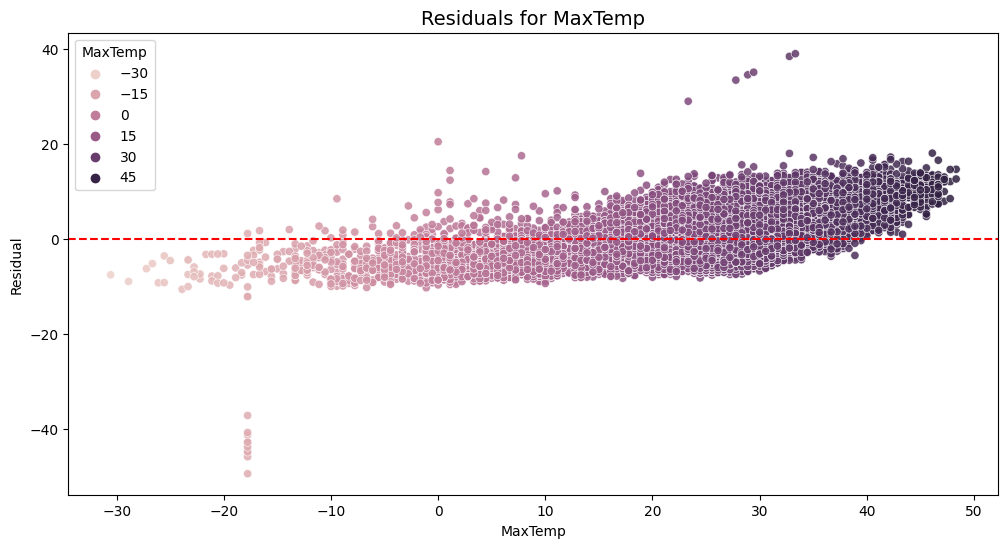

In [102]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=test_residuals,alpha=0.85, hue=y_test)
plt.axhline(y=0,color='r', ls='--')
plt.ylabel('Residual')
plt.title('Residuals for MaxTemp', fontsize=14);

### Plotting the Residuals Distribution

An important question to answer is whether the distribution of the residuals is normal or not normal. In the first approach, we are going to plot the distribution and compare the mean and median of the residuals.

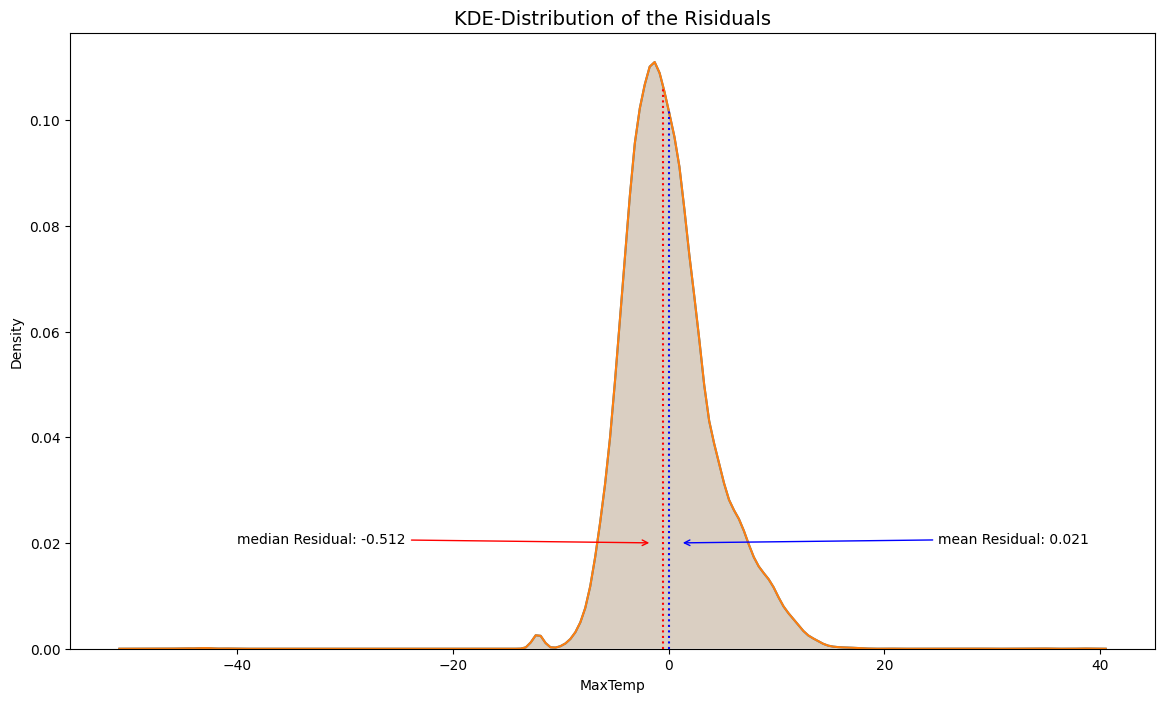

In [103]:
plt.figure(figsize=(14,8))
sns.kdeplot(test_residuals)
ax = sns.kdeplot(test_residuals)
plt.title('KDE-Distribution of the Risiduals', fontsize=14)

#Get the x,y coordinates and the mean value
kdeline = ax.lines[0]

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()


mean = test_residuals.mean()

# Calculate the hight of the kde plot at the mean 
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color="blue", ls=':') 
ax.fill_between(xs, 0, ys, alpha=0.2) 
plt.xlabel('MaxTemp')


# Annotate the kde-plot  
plt.annotate(
    'mean Residual: ' + str(np.round(test_residuals.mean(),decimals=3)),
    xy=(test_residuals.mean(), 0.02),
    xytext=(25, 0.02),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10))

median = test_residuals.median()


# Calculate the hight of the kde plot at the median

height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color="red", ls=':')
ax.fill_between(xs, 0, ys, alpha=0.2)


# Annotate the kde-plot  
plt.annotate(
    'median Residual: ' + str(np.round(test_residuals.median(),decimals=3)),
    xy=(test_residuals.median(), 0.02),
    xytext=(-40, 0.02),
    arrowprops=dict(arrowstyle='->', color='red', shrinkB=10));

As we can see, the mean and median are different from each other. That indicates that the distribution of the residuals is not normal. Another way we can also show that the distribution of the residuals is not normal is through a Shapiro-Wilk test.

### Do a Shapiro-Wilk Test

We can also use a Shapiro-Wilk test to check if the residuals are normally distributed.

Using the Shapiro-Wilk test for normal distribution p-value from the test - below 0.05 generally means non-normal.

In [104]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(test_residuals.values)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# intrerpret results
alpha = 0.05

if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally disstributed (reject H0)')



Statistics=0.952, p=0.000
Sample does not look normally disstributed (reject H0)


## Demonstrate our Model

Let's demonstrate our model. Given a MinTemp of 12°C, we want to know what is the predicted MaxTemp.

In [105]:
model.predict([[12]])

array([21.71725113])

For a MinTemp of 12°C, or model predicts a MaxTemp of 21.71725113°C.

## References

https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/